# Visualization
PySwarms implements tools for visualizing the behavior of your swarm. These are built on top of `matplotlib`, thus rendering charts that are easy to use and highly-customizable. However, it must be noted that in order to use the animation capability in PySwarms (and in `matplotlib` for that matter), at least one writer tool must be installed. Some available tools include:
* ffmpeg
* ImageMagick
* MovieWriter (base)

In the following demonstration, the `ffmpeg` tool is used. For Linux and Windows users, it can be installed via:
```shell
$ conda install -c conda-forge ffmpeg
```

In [2]:
import sys
sys.path.append('../')

First, we need to import the `pyswarms.utils.environments.PlotEnvironment` class. This enables us to use various methods to create animations or plot costs.

In [3]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.environments import PlotEnvironment

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The first step is to create an optimizer. Here, we're going to use Global-best PSO to find the minima of a sphere function. As usual, we simply create an instance of its class `pyswarms.single.GlobalBestPSO` by passing the required parameters that we will use.

In [4]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)

## Initializing the `PlotEnvironment`

Think of the `PlotEnvironment` as a container in which various plotting methods can be called. In order to create an instance of this class, we need to pass the optimizer object, the objective function, and the number of iterations needed. The `PlotEnvironment` will then simulate these parameters so as to build the plots.

In [5]:
plt_env = PlotEnvironment(optimizer, fx.sphere_func, 1000)

## Plotting the cost

To plot the cost, we simply need to call the `plot_cost()` function. There are pre-set defaults in this method already, but we can customize by passing various arguments into it such as figure size, title, x- and y-labels and etc. Furthermore, this method also accepts a keyword argument `**kwargs` similar to `matplotlib`. This enables us to further customize various artists and elements in the plot. 

For now, let's stick with the default one. We'll just call the `plot_cost()` and `show()` it.

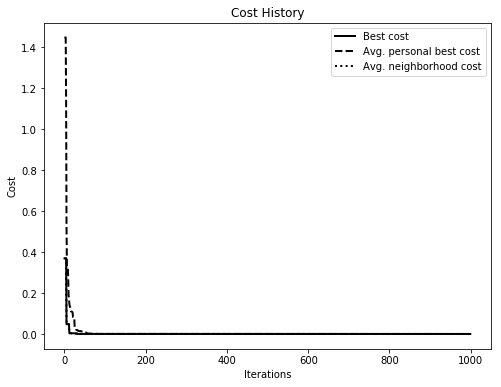

In [7]:
plt_env.plot_cost(figsize=(8,6));
plt.show()

## Animating swarms
The `PlotEnvironment()` offers two methods to perform animation, `plot_particles2D()` and `plot_particles3D()`. As its name suggests, these methods plot the particles in a 2-D or 3-D space. You can choose which dimensions will be plotted using the `index` argument, but the default takes the first 2 (or first three in 3D) indices of your swarm dimension. 

Each animation method returns a `matplotlib.animation.Animation` class that still needs to be animated by a `Writer` class (thus necessitating the installation of a writer module). For the proceeding examples, we will convert the animations into an HTML5 video. In such case, we need to invoke some extra methods to do just that.

In [10]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

### Plotting in 2-D space


In [11]:
HTML(plt_env.plot_particles2D(limits=((-1.2,1.2),(-1.2,1.2))).to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

ValueError: 'vertices' must be a 2D list or array with shape Nx2

<Figure size 432x288 with 1 Axes>

### Plotting in 3-D space

RuntimeError: Requested MovieWriter (ffmpeg) not available

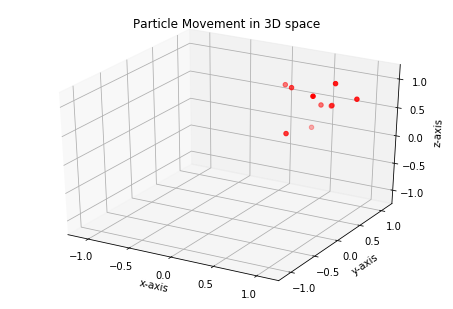

In [12]:
HTML(plt_env.plot_particles3D(limits=((-1.2,1.2),(-1.2,1.2),(-1.2,1.2))).to_html5_video())